In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from typing import Optional
import seaborn as sns
import os
import dask.dataframe as dd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dask.dataframe as dd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
base_path = "DATA"
file_path = os.path.join(base_path, "orders.csv")

orders = pd.read_csv(file_path,encoding='utf-8')
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'])

In [4]:
orders.shape

(1039865, 9)

In [5]:
orders


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1.0,125.40,0.0,2022-10-04 18:28:51,6
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1.0,8.30,0.0,2022-10-04 18:28:51,6
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1.0,1.99,0.0,2022-10-04 18:28:51,6
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1.0,5.10,0.0,2022-10-04 18:28:51,6
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1.0,76.05,0.0,2022-10-04 18:28:51,6
...,...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1.0,33.60,0.0,2023-04-30 19:35:53,2
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1.0,11.99,0.0,2023-04-30 19:19:55,13
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1.0,9.99,0.0,2023-04-30 19:19:55,13
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1.0,1.90,0.0,2023-04-30 19:32:17,9


In [6]:
n=orders['product_id'].unique()
len(n)

2000

In [7]:
p=orders['product_class'].unique()
len(p)

14

In [8]:
# net price
orders['net_price'] = orders['gross_price'] - orders['price_reduction']

# Visualizzazione del dataframe aggiornato
print(orders)

                                 order_id  customer_id  store_id  product_id  \
0        8fe4346b53d0c781b275a614175804de           23        49    35551922   
1        8fe4346b53d0c781b275a614175804de           23        49    30344384   
2        8fe4346b53d0c781b275a614175804de           23        49    33794292   
3        8fe4346b53d0c781b275a614175804de           23        49    33795776   
4        8fe4346b53d0c781b275a614175804de           23        49    36235381   
...                                   ...          ...       ...         ...   
1039860  697c0078b69d9f8c119d8dd9a7952019       934581        29    35508942   
1039861  86c9c4fdb8829e2ab90a86a357763419       934620        44    36237691   
1039862  86c9c4fdb8829e2ab90a86a357763419       934620        44    81259479   
1039863  86f8ca9e4008249e5e0acc5ff23e2284       934660        46    34067775   
1039864  d4c3ac4258e22ccdefc09a4e34e77d2c       934716        44    36161790   

         direction  gross_price  price_

In [9]:
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()

# number of order for each client
print(orders_per_customer.head())


   customer_id  order_id
0           23         8
1           30         2
2           32         3
3           48        20
4           50         2


 # APRIORI METHOD
 https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

Is the most common technique for performing market basket analysis.
It is used for association rule mining, which is a rule-based process used to identify correlations between items purchased by users.The limitation of the Apriori Algorithm is frequent itemset generation. It needs to scan the database many times, leading to increased time and reduced performance as a computationally costly step because of a large dataset. It uses the concepts of Confidence and Support.

Is crucial to transform the original dataset into a format that can be used for the analysis.
The cells contain the number of times each product has been purchased in each order.
If a product has not been purchased in a specific order, the cell contains the value 0.

In [ ]:
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'num_orders']

# Clients with more than 30 orders
orders_30= orders_per_customer[orders_per_customer['num_orders'] > 30]['customer_id'].tolist()

filtered_orders = orders[orders['customer_id'].isin(orders_30)]

filtered_orders


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
5104,6d243bb8a65e94dc13fa8b12829884fb,2495,10,35738836,1.0,5.50,0.00,2022-05-21 12:46:03,11,5.50
5105,6d243bb8a65e94dc13fa8b12829884fb,2495,10,33741533,1.0,35.88,0.00,2022-05-21 12:46:03,9,35.88
5106,db3a9398c62e37aac0dadda6616a7aa9,2495,10,33700716,1.0,0.20,0.00,2022-06-11 17:49:14,10,0.20
5107,d7dc12f01a8b2dd95bd3c0d22ded78b6,2495,10,32591503,1.0,3.35,0.45,2022-06-14 20:30:38,9,2.90
5108,67290d0a9cc3afe628e0d5710163b5c3,2495,10,32424644,1.0,4.95,0.05,2022-07-02 14:07:51,9,4.90
...,...,...,...,...,...,...,...,...,...,...
942223,e6bae3d5b70a7ee2dc31af9b7332eb65,758474,18,32755975,1.0,8.98,0.00,2023-04-07 11:23:09,11,8.98
942224,e6bae3d5b70a7ee2dc31af9b7332eb65,758474,18,34269851,1.0,4.90,0.00,2023-04-07 11:23:09,10,4.90
942225,831f168902f17291260fe212b12c295c,758474,18,32580702,1.0,4.90,0.00,2023-04-18 10:50:57,3,4.90
942226,3f3ac5b0b2650bb8c658181fcc01b24d,758474,18,35472815,1.0,2.40,0.00,2023-04-20 15:51:46,12,2.40


In [ ]:
# Converti il DataFrame Pandas in un DataFrame Dask
dd_orders = dd.from_pandas(filtered_orders, npartitions=10)  # Ridotto a 10 partizioni per gestire meglio la memoria

# Calcola la tabella basket utilizzando Dask con groupby e agg
basket = dd_orders.groupby(['order_id', 'product_id']).size().compute().reset_index()
basket = basket.pivot_table(index='order_id', columns='product_id', values=0, fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)



In [ ]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id,504553,30044455,30062452,30097186,30097291,30097340,30099454,30126292,30126306,30156203,...,81274743,81274747,81274749,82019008,82026199,82029521,82029522,82042962,82042965,82042974
order_id,,,,,,,,,,,,,,,,,,,,,
0066616ec4a264035635d24f67414997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0098e79489edad67e603673ac8c11563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00b0f28786efccf7f09b9f18ab32b96e,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
00cc86a838cf732d4fa388492710f8e2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00de21204d71ca8e9c99961d284382e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa98bcac0d441fd2522348ed379cad1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffade8ae88f29cb586256b7d62fd8c6e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffb8de1813d34527e9956d450fd1a13c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# association rules generationc
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# visualization of the first rules
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0  (31047464)  (31047415)            0.023170            0.015798  0.010532   
1  (31047415)  (31047464)            0.015798            0.023170  0.010532   
2  (31047485)  (31047415)            0.030016            0.015798  0.011058   
3  (31047415)  (31047485)            0.015798            0.030016  0.011058   
4  (31047436)  (31047485)            0.011585            0.030016  0.010005   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.454545  28.772727  0.010166    1.804371       0.988140  
1    0.666667  28.772727  0.010166    2.930490       0.980738  
2    0.368421  23.321053  0.010584    1.558320       0.986738  
3    0.700000  23.321053  0.010584    3.233281       0.972483  
4    0.863636  28.772727  0.009658    7.113217       0.976558  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


* **antecedent and cosequent support**: represent the frequency with which an antecedent or consequent (individually) appears in the dataset.
* **support**:the frequency with which the rule (combination of antecedent and consequent) appears in the dataset.
* **confidence**: measure the frequence with which the rule is true.
* **lift**:how much greater the probability of finding the antecedent and the consequent together than would be expected if they were independent.
Values greater than 1 indicate that the antecedent and consequent appear together more frequently than would be expected by chance.
* **leverage**: A positive value indicates a positive correlation between antecedent and consequent.
* **conviction**: Measures how dependent the antecedent is on the consequent.
Higher values indicate that the antecedent is strongly dependent on the consequent.
* **Zhang's metric**: is an alternative to lift and confidence for assessing association rules.
A value close to 1 indicates a random association, while higher or lower values indicate a significant or insignificant association.

In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(31047464),(31047415),0.023170,0.015798,0.010532,0.454545,28.772727,0.010166,1.804371,0.988140
1,(31047415),(31047464),0.015798,0.023170,0.010532,0.666667,28.772727,0.010166,2.930490,0.980738
2,(31047485),(31047415),0.030016,0.015798,0.011058,0.368421,23.321053,0.010584,1.558320,0.986738
3,(31047415),(31047485),0.015798,0.030016,0.011058,0.700000,23.321053,0.010584,3.233281,0.972483
4,(31047436),(31047485),0.011585,0.030016,0.010005,0.863636,28.772727,0.009658,7.113217,0.976558
5,(31047485),(31047436),0.030016,0.011585,0.010005,0.333333,28.772727,0.009658,1.482622,0.995114
6,(31047464),(31047450),0.023170,0.016851,0.012112,0.522727,31.020597,0.011721,2.059931,0.990718
7,(31047450),(31047464),0.016851,0.023170,0.012112,0.718750,31.020597,0.011721,3.473173,0.984351
8,(31047450),(31047485),0.016851,0.030016,0.013691,0.812500,27.069079,0.013186,5.173249,0.979564
9,(31047485),(31047450),0.030016,0.016851,0.013691,0.456140,27.069079,0.013186,1.807726,0.992859


In [ ]:
# Dictionary  product_id -> net_price
product_net_prices = {}

for index, row in orders.iterrows():
    product_id = row['product_id']
    net_price = row['net_price']
    product_net_prices[product_id] = net_price

product_net_prices

{35551922: -85.96,
 30344384: 8.95,
 33794292: 1.99,
 33795776: 2.55,
 36235381: 13.41,
 35002296: 1.4,
 32157580: 1.9,
 35930902: 0.7,
 81268736: 15.8,
 35930965: 0.75,
 35616882: 4.9,
 36511090: 53.98,
 34416235: 9.9,
 35932141: 1.15,
 36278235: 6.99,
 35165452: 2.85,
 34663916: 4.79,
 34663923: 4.19,
 35209202: 0.99,
 36588321: 5.9,
 36588314: 7.9,
 35861112: 5.98,
 34663874: 7.19,
 35860510: 0.99,
 31257443: 5.99,
 35411474: 4.49,
 31418982: 0.78,
 34663853: 6.75,
 36604596: 6.99,
 81259492: 37.98,
 81259552: 29.97,
 35333095: 1.99,
 36501640: 1.8,
 35606452: 11.85,
 35649740: 1.55,
 35075523: 7.65,
 35765324: 16.5,
 48500403: 984.1599999999999,
 33700716: 0.2,
 35882140: 0.97,
 35662480: 3.94,
 48081390: -20.22,
 36046360: 0.89,
 35881790: 1.19,
 35661570: 19.9,
 31047366: 0.83,
 31047450: 3.43,
 33995220: 2.49,
 36475845: 10.0,
 34337436: 5.7,
 32448794: 1.32,
 32448815: 2.24,
 31047471: 2.45,
 31047464: 0.98,
 33883955: 113.0,
 31047485: 2.94,
 31047373: 4.930000000000001,
 3104

In [ ]:
product_net_prices

{35551922: -85.96,
 30344384: 8.95,
 33794292: 1.99,
 33795776: 2.55,
 36235381: 13.41,
 35002296: 1.4,
 32157580: 1.9,
 35930902: 0.7,
 81268736: 15.8,
 35930965: 0.75,
 35616882: 4.9,
 36511090: 53.98,
 34416235: 9.9,
 35932141: 1.15,
 36278235: 6.99,
 35165452: 2.85,
 34663916: 4.79,
 34663923: 4.19,
 35209202: 0.99,
 36588321: 5.9,
 36588314: 7.9,
 35861112: 5.98,
 34663874: 7.19,
 35860510: 0.99,
 31257443: 5.99,
 35411474: 4.49,
 31418982: 0.78,
 34663853: 6.75,
 36604596: 6.99,
 81259492: 37.98,
 81259552: 29.97,
 35333095: 1.99,
 36501640: 1.8,
 35606452: 11.85,
 35649740: 1.55,
 35075523: 7.65,
 35765324: 16.5,
 48500403: 984.1599999999999,
 33700716: 0.2,
 35882140: 0.97,
 35662480: 3.94,
 48081390: -20.22,
 36046360: 0.89,
 35881790: 1.19,
 35661570: 19.9,
 31047366: 0.83,
 31047450: 3.43,
 33995220: 2.49,
 36475845: 10.0,
 34337436: 5.7,
 32448794: 1.32,
 32448815: 2.24,
 31047471: 2.45,
 31047464: 0.98,
 33883955: 113.0,
 31047485: 2.94,
 31047373: 4.930000000000001,
 3104

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


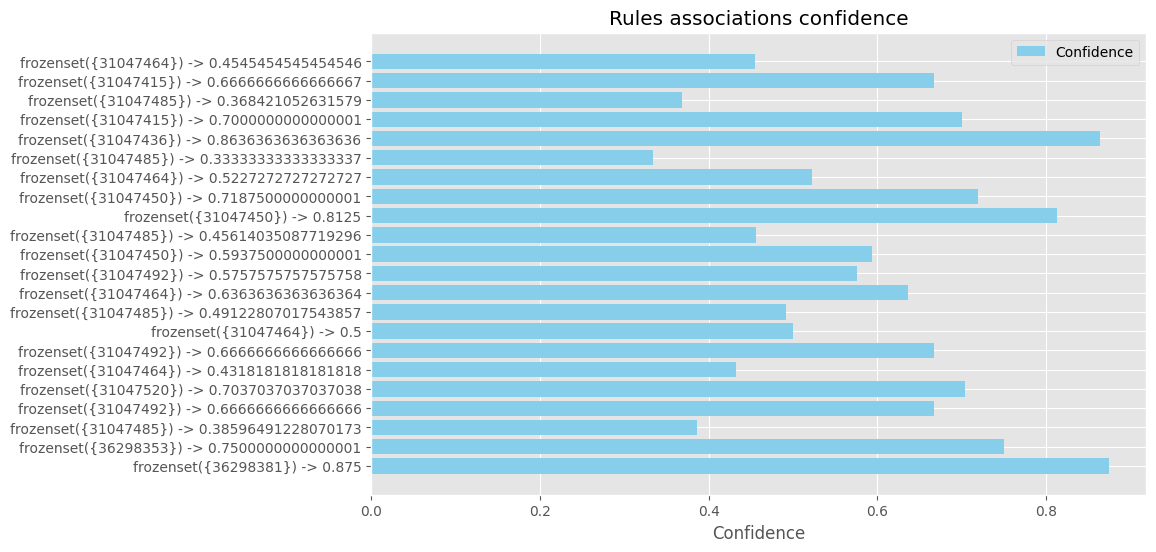

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(rules['antecedents'])), rules['confidence'], color='skyblue', label='Confidence')
ax.set_yticks(range(len(rules['antecedents'])))
ax.set_yticklabels([f"{a} -> {c}" for a, c in zip(rules['antecedents'], rules['confidence'])])
ax.invert_yaxis()  # Inverti l'asse y per rendere le barre in ordine decrescente
ax.set_xlabel('Confidence')
ax.set_title('Rules associations confidence')

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


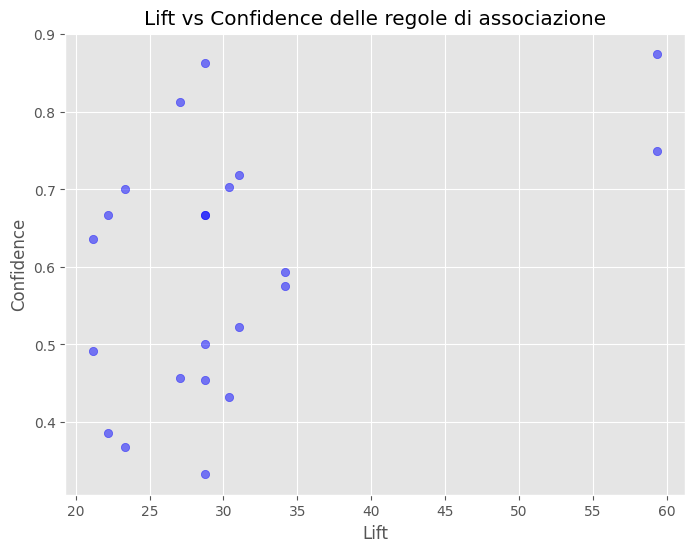

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot  lift vs confidence
ax.scatter(rules['lift'], rules['confidence'], color='blue', alpha=0.5)
ax.set_xlabel('Lift')
ax.set_ylabel('Confidence')
ax.set_title('Lift vs Confidence in association rules')

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


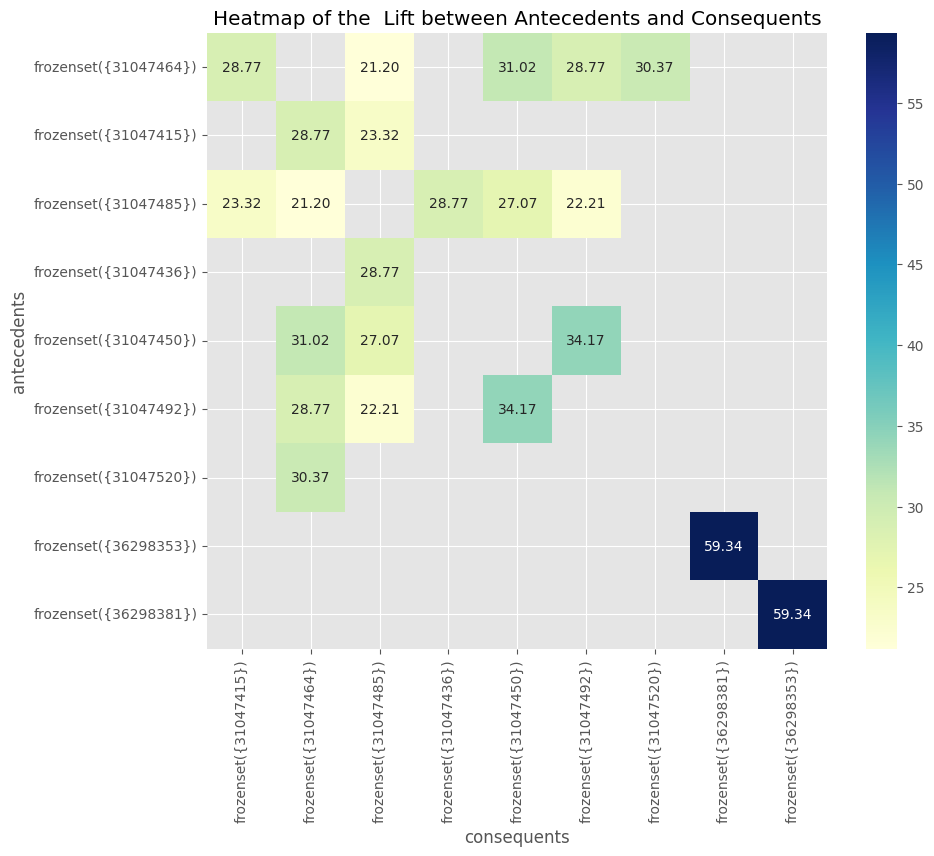

In [ ]:
#  DataFrame for the  heatmap
data = {'antecedents': rules['antecedents'], 'consequents': rules['consequents'], 'lift': rules['lift']}
df_heatmap = pd.DataFrame(data)

# Pivot della tabella per la heatmap
heatmap_data = df_heatmap.pivot(index='antecedents', columns='consequents', values='lift')

# Plot della heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of the  Lift between Antecedents and Consequents')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


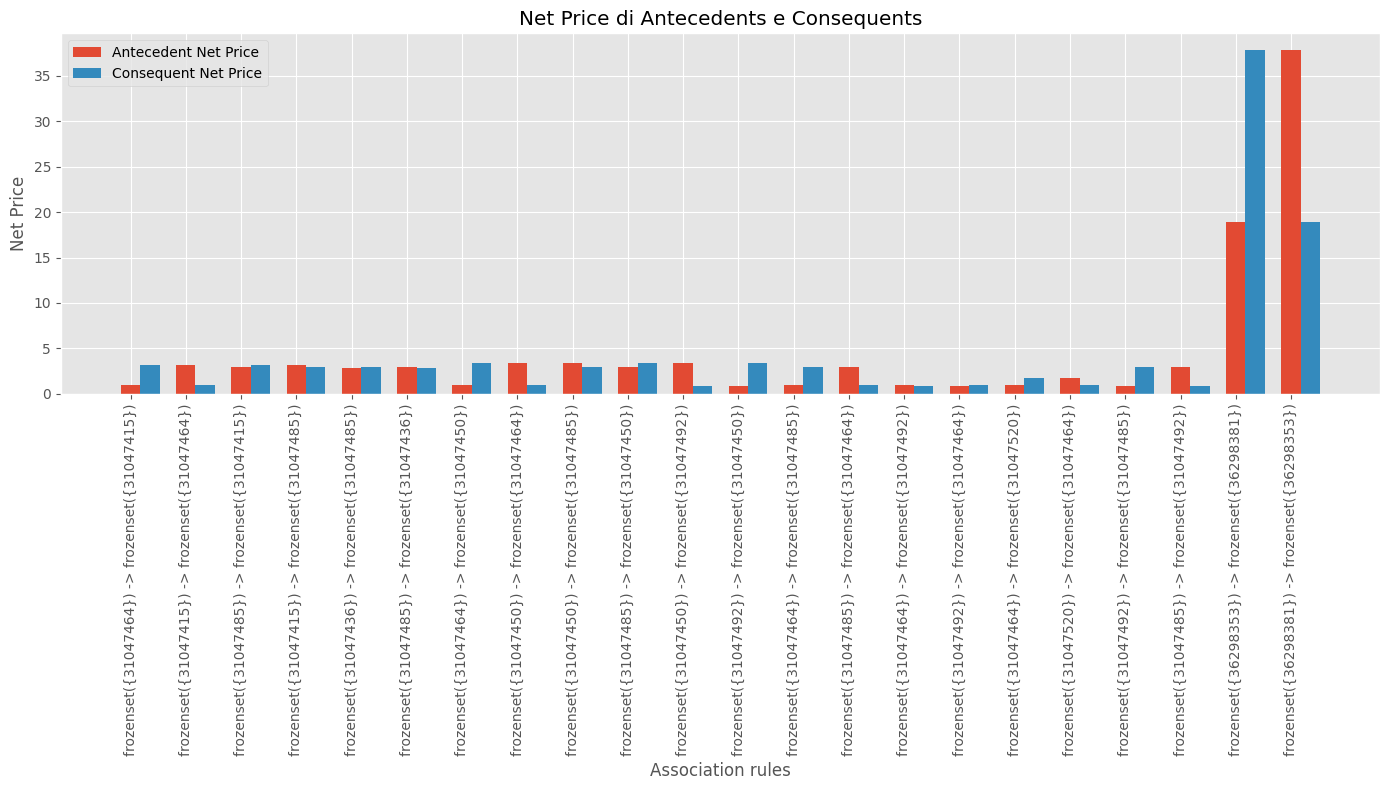

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar1 = ax.bar(range(len(rules['antecedents'])), rules['antecedent_net_price'], bar_width, label='Antecedent Net Price')
bar2 = ax.bar([x + bar_width for x in range(len(rules['consequents']))], rules['consequent_net_price'], bar_width, label='Consequent Net Price')

ax.set_xticks(range(len(rules['antecedents'])))
ax.set_xticklabels([f"{a} -> {c}" for a, c in zip(rules['antecedents'], rules['consequents'])], rotation=90)  # Rotate labels 90 degrees
ax.set_xlabel('Association rules')
ax.set_ylabel('Net Price')
ax.set_title('Net Price di Antecedents e Consequents')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# dictionary that map the product class for each product id
product_class_dict = filtered_orders.set_index('product_id')['product_class'].to_dict()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# estract product class
def get_product_class(product_id_set, product_class_dict):
    product_id = list(product_id_set)[0]
    return product_class_dict.get(product_id, None)

rules['antecedent_class'] = rules['antecedents'].apply(lambda x: get_product_class(x, product_class_dict))
rules['consequent_class'] = rules['consequents'].apply(lambda x: get_product_class(x, product_class_dict))

print(rules)

   antecedents consequents  antecedent support  consequent support   support  \
0   (31047464)  (31047415)            0.023170            0.015798  0.010532   
1   (31047415)  (31047464)            0.015798            0.023170  0.010532   
2   (31047485)  (31047415)            0.030016            0.015798  0.011058   
3   (31047415)  (31047485)            0.015798            0.030016  0.011058   
4   (31047436)  (31047485)            0.011585            0.030016  0.010005   
5   (31047485)  (31047436)            0.030016            0.011585  0.010005   
6   (31047464)  (31047450)            0.023170            0.016851  0.012112   
7   (31047450)  (31047464)            0.016851            0.023170  0.012112   
8   (31047450)  (31047485)            0.016851            0.030016  0.013691   
9   (31047485)  (31047450)            0.030016            0.016851  0.013691   
10  (31047450)  (31047492)            0.016851            0.017378  0.010005   
11  (31047492)  (31047450)            0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_orders

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
5104,6d243bb8a65e94dc13fa8b12829884fb,2495,10,35738836,1.0,5.50,0.00,2022-05-21 12:46:03,11,5.50
5105,6d243bb8a65e94dc13fa8b12829884fb,2495,10,33741533,1.0,35.88,0.00,2022-05-21 12:46:03,9,35.88
5106,db3a9398c62e37aac0dadda6616a7aa9,2495,10,33700716,1.0,0.20,0.00,2022-06-11 17:49:14,10,0.20
5107,d7dc12f01a8b2dd95bd3c0d22ded78b6,2495,10,32591503,1.0,3.35,0.45,2022-06-14 20:30:38,9,2.90
5108,67290d0a9cc3afe628e0d5710163b5c3,2495,10,32424644,1.0,4.95,0.05,2022-07-02 14:07:51,9,4.90
...,...,...,...,...,...,...,...,...,...,...
942223,e6bae3d5b70a7ee2dc31af9b7332eb65,758474,18,32755975,1.0,8.98,0.00,2023-04-07 11:23:09,11,8.98
942224,e6bae3d5b70a7ee2dc31af9b7332eb65,758474,18,34269851,1.0,4.90,0.00,2023-04-07 11:23:09,10,4.90
942225,831f168902f17291260fe212b12c295c,758474,18,32580702,1.0,4.90,0.00,2023-04-18 10:50:57,3,4.90
942226,3f3ac5b0b2650bb8c658181fcc01b24d,758474,18,35472815,1.0,2.40,0.00,2023-04-20 15:51:46,12,2.40


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    product_class  unique_product_count
0               6                   133
1               3                   552
2              13                   174
3               5                    38
4               2                    89
5               7                   207
6              14                    65
7              11                   249
8               4                   112
9               9                    98
10             10                   119
11              8                    50
12              1                    55
13             12                    59


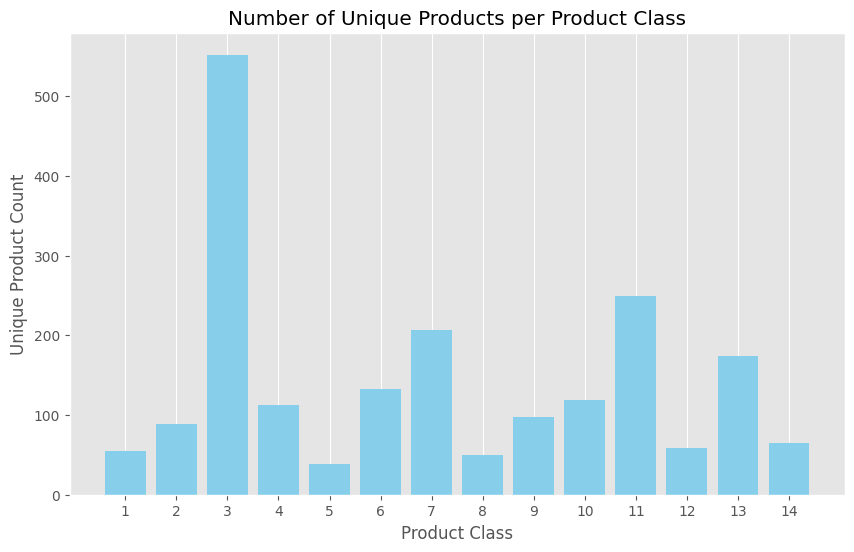

In [ ]:
seen_products = set()
product_class_counts = {}

# iteration
for idx, row in orders.iterrows():
    product_id = row['product_id']
    product_class = row['product_class']

    if product_id not in seen_products:
        seen_products.add(product_id)
        if product_class in product_class_counts:
            product_class_counts[product_class] += 1
        else:
            product_class_counts[product_class] = 1


product_class_counts_df = pd.DataFrame(list(product_class_counts.items()), columns=['product_class', 'unique_product_count'])

print(product_class_counts_df)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(product_class_counts_df['product_class'], product_class_counts_df['unique_product_count'], color='skyblue')
plt.xlabel('Product Class')
plt.ylabel('Unique Product Count')
plt.title('Number of Unique Products per Product Class')
plt.xticks(product_class_counts_df['product_class'])  # Ensure all classes are shown
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    product_class  unique_product_count
0              11                   177
1               9                    49
2              10                    71
3               3                   446
4               4                    83
5               1                    47
6               2                    49
7              13                    61
8               8                    31
9               6                    84
10             14                    31
11              7                   109
12              5                    18
13             12                    16


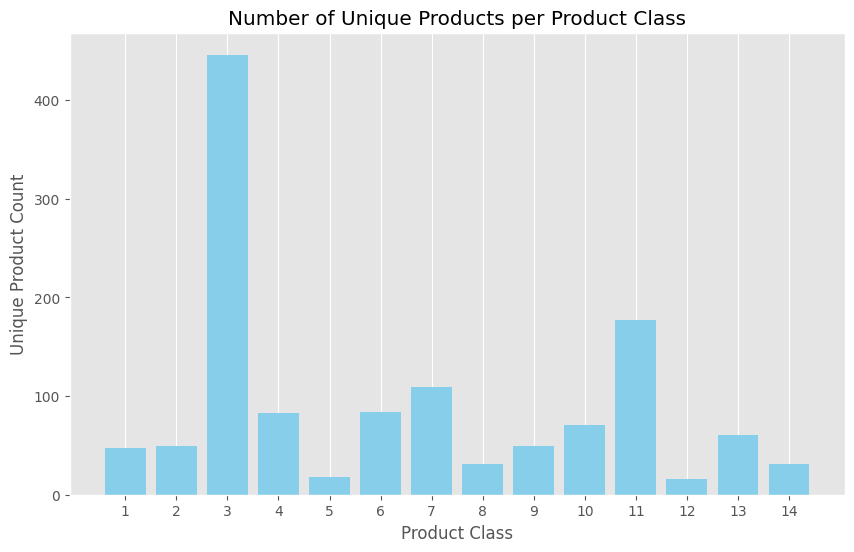

In [ ]:
seen_products = set()
product_class_counts = {}

# iteration
for idx, row in filtered_orders.iterrows():
    product_id = row['product_id']
    product_class = row['product_class']

    if product_id not in seen_products:
        seen_products.add(product_id)
        if product_class in product_class_counts:
            product_class_counts[product_class] += 1
        else:
            product_class_counts[product_class] = 1


product_class_counts_df = pd.DataFrame(list(product_class_counts.items()), columns=['product_class', 'unique_product_count'])

print(product_class_counts_df)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(product_class_counts_df['product_class'], product_class_counts_df['unique_product_count'], color='skyblue')
plt.xlabel('Product Class')
plt.ylabel('Unique Product Count')
plt.title('Number of Unique Products per Product Class')
plt.xticks(product_class_counts_df['product_class'])  # Ensure all classes are shown
plt.grid(axis='y')
plt.show()

# MBA for product class

In [ ]:
orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1.0,125.40,0.0,2022-10-04 18:28:51,6,125.40
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1.0,8.30,0.0,2022-10-04 18:28:51,6,8.30
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1.0,1.99,0.0,2022-10-04 18:28:51,6,1.99
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1.0,5.10,0.0,2022-10-04 18:28:51,6,5.10
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1.0,76.05,0.0,2022-10-04 18:28:51,6,76.05
...,...,...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1.0,33.60,0.0,2023-04-30 19:35:53,2,33.60
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1.0,11.99,0.0,2023-04-30 19:19:55,13,11.99
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1.0,9.99,0.0,2023-04-30 19:19:55,13,9.99
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1.0,1.90,0.0,2023-04-30 19:32:17,9,1.90


In [ ]:
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'num_orders']

# Clients with more than 10 orders
orders_10= orders_per_customer[orders_per_customer['num_orders'] > 10]['customer_id'].tolist()

filtered_orders = orders[orders['customer_id'].isin(orders_10)]

filtered_orders


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
62,f0fa5d354bd7a6384b18808754840cdf,48,49,34337436,1.0,85.50,6.00,2022-08-11 14:58:17,1,79.50
63,46336cc9a409eedb8c4d17fcf42a1b5c,48,49,32448794,1.0,99.00,27.00,2022-08-11 17:58:37,1,72.00
64,46336cc9a409eedb8c4d17fcf42a1b5c,48,49,32448815,1.0,48.00,0.00,2022-08-11 17:58:37,1,48.00
65,81cc2d29faea6b63e6224a66c33fe6b6,48,49,31047471,1.0,0.98,0.00,2022-11-06 20:25:15,3,0.98
66,b4d7e21e6e4a1f8fb3d821e74fa556d2,48,49,31047464,1.0,3.92,0.00,2022-11-14 18:55:23,3,3.92
...,...,...,...,...,...,...,...,...,...,...
1037989,d9d2e425538b57fc06593b6477add653,917185,48,81272097,1.0,39.99,0.00,2023-04-26 15:06:16,7,39.99
1037990,390fe6bef0140e0ad7f514cdbfb1ab92,917185,48,36149645,1.0,17.40,1.29,2023-04-29 15:14:32,6,16.11
1037991,390fe6bef0140e0ad7f514cdbfb1ab92,917185,48,35554932,1.0,23.25,1.72,2023-04-29 15:14:32,1,21.53
1037992,390fe6bef0140e0ad7f514cdbfb1ab92,917185,48,36324274,1.0,8.45,0.63,2023-04-29 15:14:32,1,7.82


In [ ]:
# Converti il DataFrame Pandas in un DataFrame Dask
dd_orders = dd.from_pandas(filtered_orders, npartitions=10)

# Calcola la tabella basket utilizzando Dask con groupby e agg
basket = dd_orders.groupby(['order_id', 'product_class']).size().compute().reset_index()
basket = basket.pivot_table(index='order_id', columns='product_class', values=0, fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_class,1,2,3,4,5,6,7,8,9,10,11,12,13,14
order_id,,,,,,,,,,,,,,
0001ca820ec51ee98ac6300276db5368,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0008e84b907863fb3e6a104afa217762,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0009dd992a1ae63e4f48fd3a3600617d,1,0,1,0,0,0,0,0,0,1,0,0,0,0
000a3486c62ae02b6d317d33f7bcd255,0,1,0,0,0,0,0,0,0,0,0,0,0,0
000ba82ceeac476093113e0cbc5c4aaf,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd654bc17465dff234aeb495c648da,0,0,0,0,0,0,1,0,0,0,0,0,0,0
fffd7182a21462a92d9ebc4b2d14ba5e,0,0,1,0,0,0,0,0,0,0,0,0,1,0
fffef1e4766017e75f0db930c336e4d6,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# association rules generationc
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# visualization of the first rules
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0         (8)         (3)            0.029352            0.354019  0.010579   
1         (3)         (8)            0.354019            0.029352  0.010579   
2        (10)         (3)            0.251873            0.354019  0.102969   
3         (3)        (10)            0.354019            0.251873  0.102969   
4        (10)         (4)            0.251873            0.104095  0.034436   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.360412  1.018059  0.000188    1.009996       0.018275  
1    0.029882  1.018059  0.000188    1.000546       0.027460  
2    0.408813  1.154778  0.013801    1.092685       0.179158  
3    0.290857  1.154778  0.013801    1.054974       0.207487  
4    0.136720  1.313415  0.008217    1.037792       0.318965  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
net_price_totals = orders.groupby('product_class')['net_price'].sum().reset_index()

net_price_totals.columns = ['product_class', 'total_net_price']

print(net_price_totals)

    product_class  total_net_price
0               1        548420.32
1               2       9748728.39
2               3       2272229.31
3               4        335222.82
4               5        213105.30
5               6       3849779.11
6               7       3357369.75
7               8       1041606.45
8               9        340839.02
9              10        462581.93
10             11       1153814.64
11             12        255649.70
12             13       1359039.55
13             14        538612.83


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dictionary  product_id -> net_price
product_net_prices = {}

for index, row in net_price_totals.iterrows():
    product_id = row['product_class']
    net_price = row['total_net_price']
    product_net_prices[product_id] = net_price

product_net_prices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{1.0: 548420.32,
 2.0: 9748728.39,
 3.0: 2272229.31,
 4.0: 335222.82,
 5.0: 213105.3,
 6.0: 3849779.11,
 7.0: 3357369.75,
 8.0: 1041606.4500000001,
 9.0: 340839.02,
 10.0: 462581.93,
 11.0: 1153814.64,
 12.0: 255649.7,
 13.0: 1359039.55,
 14.0: 538612.83}

In [ ]:
rules['antecedent_class_net_price'] = rules['antecedents'].map(lambda x: product_net_prices[list(x)[0]])
rules['consequent_class_net_price'] = rules['consequents'].map(lambda x: product_net_prices[list(x)[0]])

rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_net_price,consequents_net_price,antecedent_class_net_price,consequent_class_net_price
0,(8),(3),0.029352,0.354019,0.010579,0.360412,1.018059,0.000188,1.009996,0.018275,8,3,1041606.45,2272229.31
1,(3),(8),0.354019,0.029352,0.010579,0.029882,1.018059,0.000188,1.000546,0.027460,3,8,2272229.31,1041606.45
2,(10),(3),0.251873,0.354019,0.102969,0.408813,1.154778,0.013801,1.092685,0.179158,10,3,462581.93,2272229.31
3,(3),(10),0.354019,0.251873,0.102969,0.290857,1.154778,0.013801,1.054974,0.207487,3,10,2272229.31,462581.93
4,(10),(4),0.251873,0.104095,0.034436,0.136720,1.313415,0.008217,1.037792,0.318965,10,4,462581.93,335222.82


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


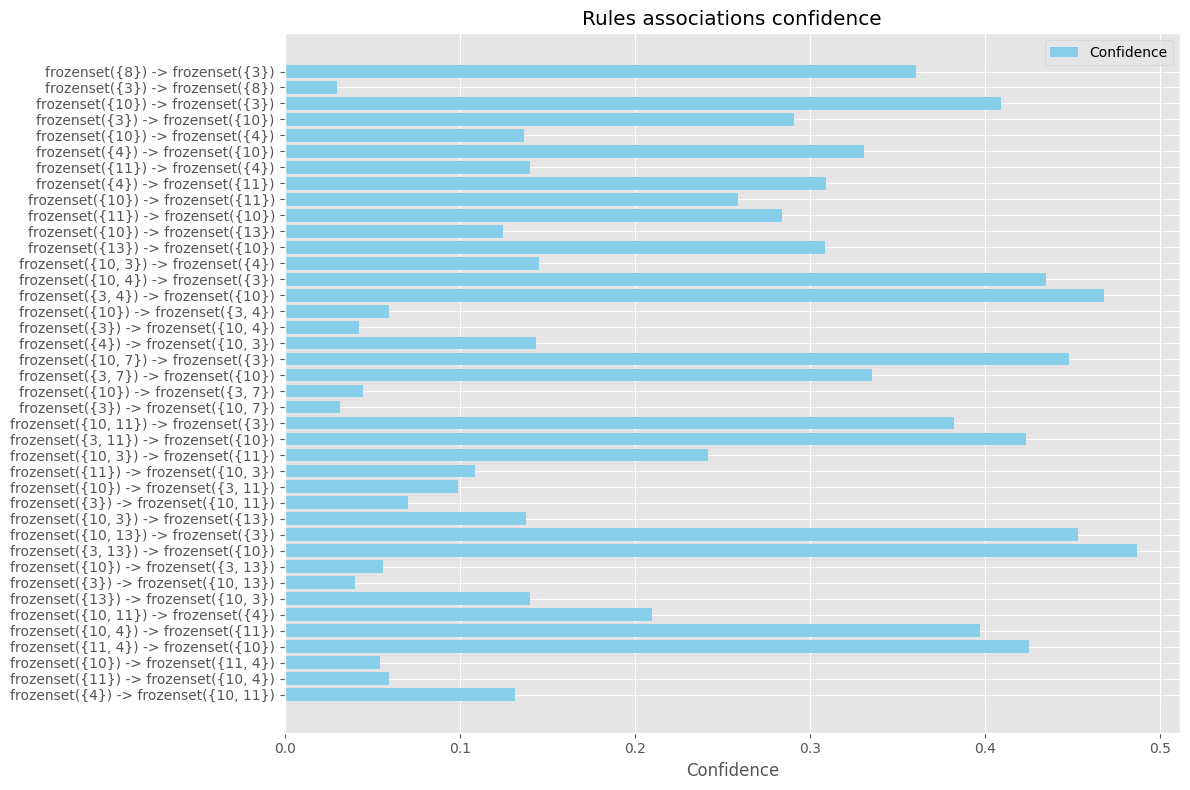

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(range(len(rules['antecedents'])), rules['confidence'], color='skyblue', label='Confidence')
ax.set_yticks(range(len(rules['antecedents'])))
ax.set_yticklabels([f"{a} -> {c}" for a, c in zip(rules['antecedents'], rules['consequents'])], fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('Confidence')
ax.set_title('Rules associations confidence')

plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


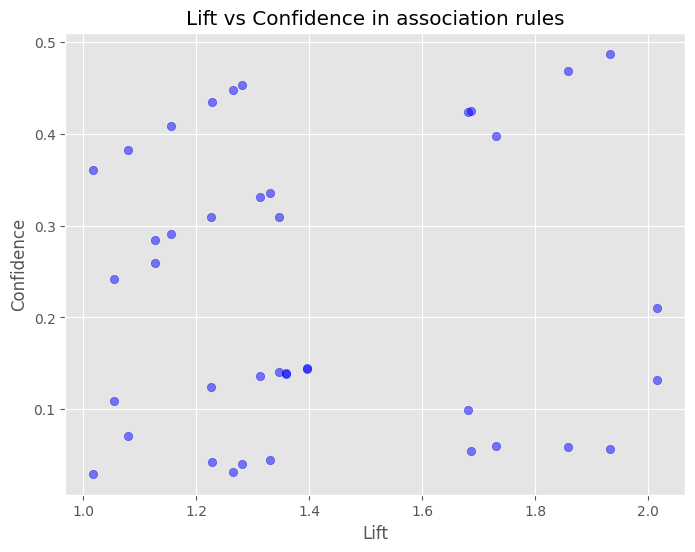

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot  lift vs confidence
ax.scatter(rules['lift'], rules['confidence'], color='blue', alpha=0.5)
ax.set_xlabel('Lift')
ax.set_ylabel('Confidence')
ax.set_title('Lift vs Confidence in association rules')

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


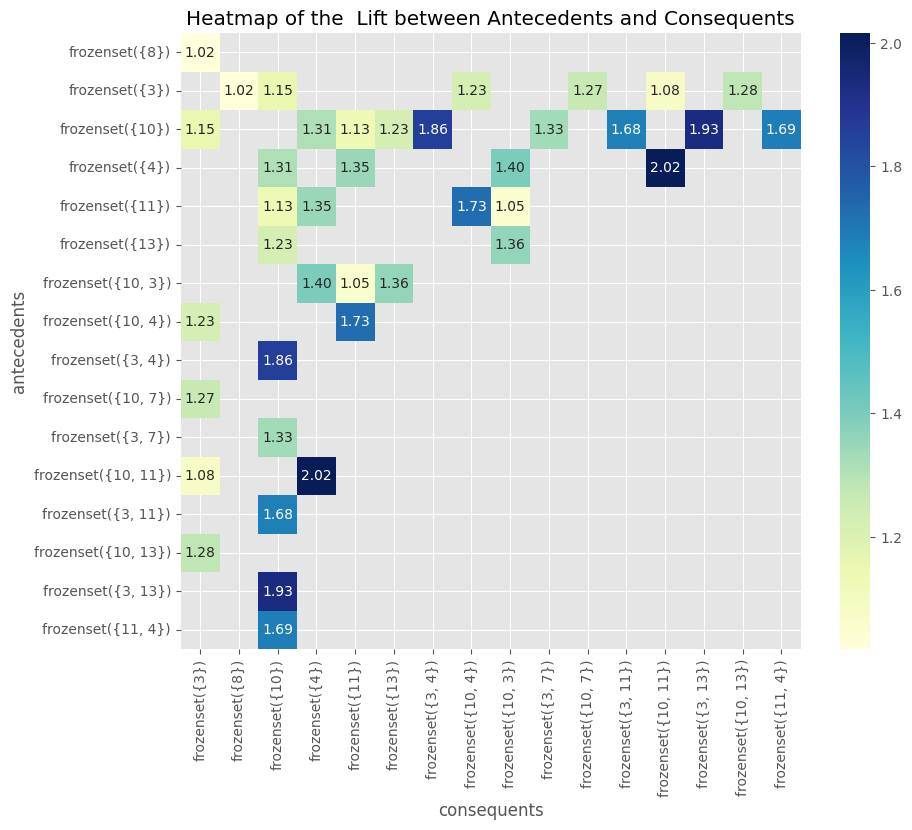

In [ ]:
#  DataFrame for the  heatmap
data = {'antecedents': rules['antecedents'], 'consequents': rules['consequents'], 'lift': rules['lift']}
df_heatmap = pd.DataFrame(data)

# Pivot della tabella per la heatmap
heatmap_data = df_heatmap.pivot(index='antecedents', columns='consequents', values='lift')

# Plot della heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of the  Lift between Antecedents and Consequents')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


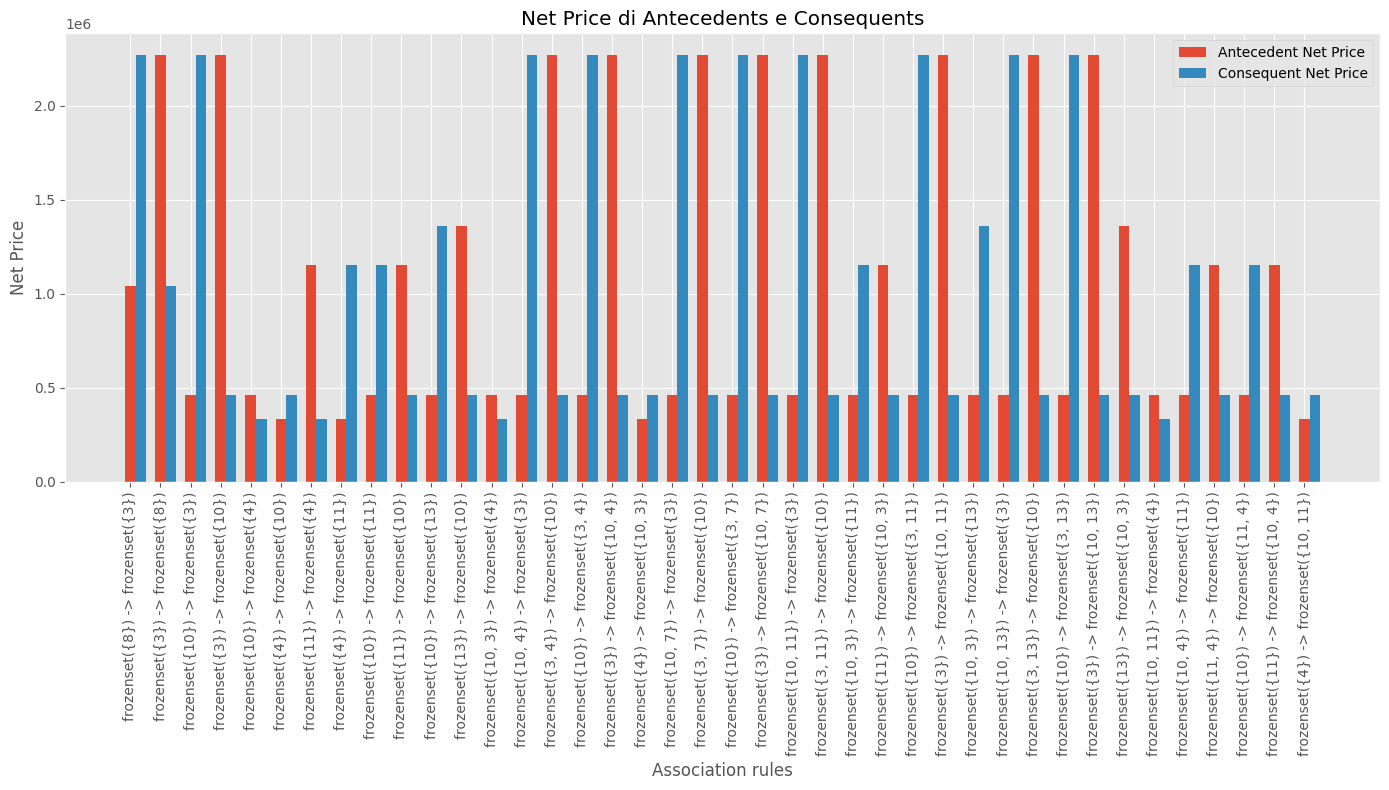

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar1 = ax.bar(range(len(rules['antecedents'])), rules['antecedent_class_net_price'], bar_width, label='Antecedent Net Price')
bar2 = ax.bar([x + bar_width for x in range(len(rules['consequents']))], rules['consequent_class_net_price'], bar_width, label='Consequent Net Price')

ax.set_xticks(range(len(rules['antecedents'])))
ax.set_xticklabels([f"{a} -> {c}" for a, c in zip(rules['antecedents'], rules['consequents'])], rotation=90)
ax.set_xlabel('Association rules')
ax.set_ylabel('Net Price')
ax.set_title('Net Price di Antecedents e Consequents')

plt.legend()
plt.tight_layout()
plt.show()

# One order customers
With the rules obtained via MBA, it is possible to select new customers who have placed one order, and, if the product purchased falls within the antecedents of the MBA rules, to offer them a related product to turn them into Repeater Customers.  

In [44]:
# Load of the rules dataset obtained
path = "Models"
rule_path = os.path.join(path, "rules.csv")

In [45]:
rules=pd.read_csv(rule_path)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(32831085),(32851406),0.008110,0.003353,0.001041,0.128358,38.283647,0.001014,1.143414,0.981842
1,(32851406),(32831085),0.003353,0.008110,0.001041,0.310469,38.283647,0.001014,1.438501,0.977155
2,(33700716),(35615055),0.107787,0.005967,0.001501,0.013925,2.333513,0.000858,1.008070,0.640499
3,(35615055),(33700716),0.005967,0.107787,0.001501,0.251521,2.333513,0.000858,1.192036,0.574892
4,(32079082),(32079103),0.012225,0.012261,0.008170,0.668317,54.505757,0.008020,2.977958,0.993803


In [46]:
# Funzione per pulire e convertire i valori
def clean_and_convert(value):
    if 'frozenset' in value:
        cleaned = re.sub(r'frozenset\(\{|\}\)', '', value)
    else:
        cleaned = value.strip('()')
    return tuple(map(int, cleaned.split(', ')))

# Applicare la funzione di conversione alle colonne antecedents e consequents
rules['antecedents'] = rules['antecedents'].apply(clean_and_convert)
rules['consequents'] = rules['consequents'].apply(clean_and_convert)

In [47]:
rules['antecedents']

0         (32831085,)
1         (32851406,)
2         (33700716,)
3         (35615055,)
4         (32079082,)
             ...     
133273    (36327046,)
133274    (31194464,)
133275    (31047485,)
133276    (35498001,)
133277    (35498043,)
Name: antecedents, Length: 133278, dtype: object

In [48]:
orders_per_customer

,customer_id,num_orders
0,23,8
1,30,2
2,32,3
3,48,20
4,50,2
...,...,...
104129,934484,1
104130,934581,1
104131,934620,1
104132,934660,1


In [49]:
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'num_orders']

# Clients with 1 order
one_order= orders_per_customer[orders_per_customer['num_orders'] <2]['customer_id'].tolist()

orders_1 = orders[orders['customer_id'].isin(one_order)]

orders_1


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
135,c14cd4c68ccabf1a47585bb4eced7ed4,60,49,35486626,1.0,49.98,0.0,2022-12-13 20:09:13,12,49.98
139,0bedd5ef545c4d82f2575f0263997a6b,86,15,33700716,1.0,0.20,0.0,2022-05-04 12:32:34,10,0.20
140,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606403,1.0,3.95,0.0,2022-05-04 12:32:34,9,3.95
141,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606473,1.0,3.95,0.0,2022-05-04 12:32:34,9,3.95
142,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606480,1.0,3.95,0.0,2022-05-04 12:32:34,9,3.95
...,...,...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1.0,33.60,0.0,2023-04-30 19:35:53,2,33.60
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1.0,11.99,0.0,2023-04-30 19:19:55,13,11.99
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1.0,9.99,0.0,2023-04-30 19:19:55,13,9.99
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1.0,1.90,0.0,2023-04-30 19:32:17,9,1.90


I *customer_id* che si ripetono sono riferiti a clienti che hanno effettuato un solo ordine ma all'interno d questo sono presenti più prodotti.

In [50]:
orders['product_id']

0          35551922
1          30344384
2          33794292
3          33795776
4          36235381
             ...   
1039860    35508942
1039861    36237691
1039862    81259479
1039863    34067775
1039864    36161790
Name: product_id, Length: 1039865, dtype: int64

In [51]:
unique_antecedents = [list(antecedent)[0] for antecedent in rules['antecedents']]

# Id products
recent_product_ids = orders_1['product_id'].unique()

# Consequents products
matching_products = set(recent_product_ids).intersection(set(unique_antecedents))

print("Product IDs negli acquisti recenti:", recent_product_ids)
print("Antecedents unici nelle regole:", unique_antecedents)
print("Product IDs corrispondenti:", matching_products)



Product IDs negli acquisti recenti: [35486626 33700716 35606403 ... 31047331 36568763 35788753]
Antecedents unici nelle regole: [32831085, 32851406, 33700716, 35615055, 32079082, 32079103, 32079082, 33817091, 32079082, 33700716, 32079082, 32079082, 33700716, 32079082, 33700716, 32079103, 32079082, 34498282, 34498282, 31047485, 31047464, 34498282, 31047450, 34498282, 34498282, 32079103, 34498282, 32842551, 34199200, 34498282, 31047464, 31047464, 34498282, 31047464, 34498282, 31047485, 31047464, 31047464, 31047450, 31047464, 31047450, 34498282, 31047450, 31047450, 34498282, 31047450, 34498282, 31047485, 31047464, 31047464, 31047464, 31047450, 31047464, 31047464, 31047464, 31047450, 31047450, 34498282, 31047464, 31047450, 34498282, 31047485, 32079082, 32079082, 34498282, 32079082, 34498282, 32079103, 33700716, 32581101, 32581101, 32580695, 32580961, 32581101, 32580961, 32580695, 32580961, 32580961, 32581101, 32580961, 32581101, 32580695, 32580632, 32581101, 35984396, 35984452, 35572810, 3

In [52]:
suggestions = []

for product_id in matching_products:
    # find antecedents
    relevant_rules = rules[rules['antecedents'].apply(lambda x: product_id in x)]

    # Consequent with higher report
    if not relevant_rules.empty:
        suggested_product = relevant_rules.loc[relevant_rules['support'].idxmax()]['consequents']
        suggested_product_id = list(suggested_product)[0]  # Estrai il product_id dal frozenset

        suggestions.append({
            'customer_id': orders_1.loc[orders_1['product_id'] == product_id, 'customer_id'].iloc[0],
            'recent_product_id': product_id,
            'recent_purchase_datetime': orders_1.loc[orders_1['product_id'] == product_id, 'purchase_datetime'].iloc[0],
            'recent_product': orders_1.loc[orders_1['product_id'] == product_id, 'product_class'].iloc[0],
            'suggested_product': suggested_product_id
        })

suggestions_df = pd.DataFrame(suggestions)
print(suggestions_df)


     customer_id  recent_product_id recent_purchase_datetime  recent_product  \
0           7134           36531201      2023-04-05 12:38:54               3   
1          26274           36093953      2022-06-03 15:11:44               3   
2           1367           33817091      2023-04-18 13:28:16              10   
3          69326           32842761      2022-05-25 16:10:06               3   
4           3559           35984396      2022-08-11 11:04:15               7   
..           ...                ...                      ...             ...   
129         6922           36298220      2022-05-29 10:44:23               3   
130        21469           32581101      2022-05-16 08:42:53               3   
131         7134           32078830      2023-04-05 12:38:54               3   
132       156418           35879921      2022-05-27 12:40:13               3   
133         5593           32078844      2022-06-23 09:56:27               3   

     suggested_product  
0             

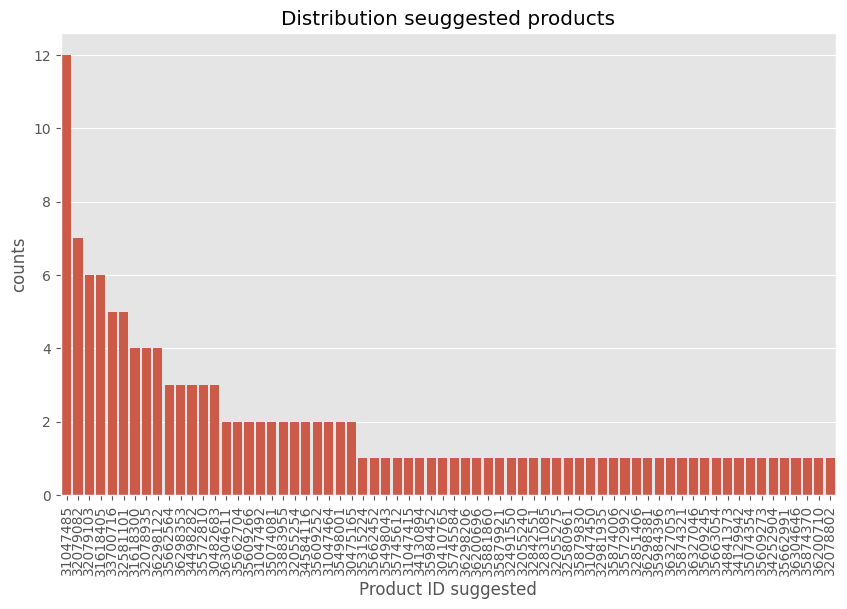

In [53]:
# Bar Plot for the visualization of suggested products
plt.figure(figsize=(10, 6))
sns.countplot(data=suggestions_df, x='suggested_product', order=suggestions_df['suggested_product'].value_counts().index)
plt.title('Distribution seuggested products')
plt.xlabel('Product ID suggested')
plt.ylabel('counts')
plt.xticks(rotation=90)
plt.show()

# Suggested products for each customer with more than one order, based on their last purchase

In [54]:

# selection of the last order for the customers with more than 1 order
orders_per_customer = orders.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'num_orders']

multi_order_customers = orders_per_customer[orders_per_customer['num_orders'] > 1]['customer_id'].tolist()

multi_orders = orders[orders['customer_id'].isin(multi_order_customers)]

last_orders_idx = multi_orders.groupby('customer_id')['purchase_datetime'].idxmax()
last_orders = multi_orders.loc[last_orders_idx]

print(last_orders)


                                 order_id  customer_id  store_id  product_id  \
34       8b3bbc136572e9ef8e5f8356b4a28038           23        49    34663923   
40       2685d6e34e5f26eea7bd6143fa7ed3e4           30        49    35075523   
60       15d4bb50536563ff33fd06c772ce2f7d           32        49    33995220   
130      9bf909fd2d40269107251cf90d0bc3ce           48        49    34584116   
133      29ba6f067409ca5426ef7a6749d0f124           50        49    33892572   
...                                   ...          ...       ...         ...   
1039742  1c8ca51e31937e24d15af8d013e53b46       929562        23    35163436   
1039758  f30f4855f269589108f70f4fcacf7801       929899        25    35582386   
1039782  35a7e720b2e20b6d592264452e4acbbc       933057        37    35567966   
1039787  9679b2b2c99f6a96a3380b99b6a89d01       933559         3    34554324   
1039833  77746cb9eb0b08d310ee7b3690a30f39       934317        28    35611086   

         direction  gross_price  price_

In [55]:
suggestions = []

for index, row in last_orders.iterrows():
    customer_id = row['customer_id']
    product_id = row['product_id']
    product_class = row['product_class']
    purchase_datetime = row['purchase_datetime']

    # relevant rules
    relevant_rules = rules[rules['antecedents'].apply(lambda x: product_id in x)]

    # product suggestion with the higher support
    if not relevant_rules.empty:
        suggested_product = relevant_rules.loc[relevant_rules['support'].idxmax()]['consequents']
        suggested_product_id = list(suggested_product)[0]  # Estrai il product_id dal frozenset

        suggestions.append({
            'customer_id': customer_id,
            'recent_product_id': product_id,
            'recent_purchase_datetime': purchase_datetime,
            'recent_product_class': product_class,
            'suggested_product_id': suggested_product_id
        })

suggestions_2 = pd.DataFrame(suggestions)
print(suggestions_2)


       customer_id  recent_product_id recent_purchase_datetime  \
0               48           34584116      2023-04-30 19:35:36   
1              194           30482683      2023-04-25 18:43:48   
2              347           33700716      2022-11-17 15:35:49   
3              375           35879921      2023-01-12 10:05:18   
4              470           33700716      2022-11-23 18:05:13   
...            ...                ...                      ...   
14416       925030           33700716      2023-04-30 15:15:31   
14417       925761           33937771      2023-04-29 10:59:25   
14418       927433           31618405      2023-04-29 17:36:21   
14419       927464           33700716      2023-04-26 16:39:14   
14420       927923           33700716      2023-04-27 19:38:44   

       recent_product_class  suggested_product_id  
0                         1              34841373  
1                         3              32981935  
2                        10              32079082  

# Selection of the customers who  spent more

In [57]:
total_spent_per_customer = orders.groupby('customer_id')['net_price'].sum().reset_index()
total_spent_per_customer.columns = ['customer_id', 'total_spent']

# total spent for each customer
print(total_spent_per_customer)

        customer_id  total_spent
0                23       474.55
1                30      9772.83
2                32        58.85
3                48       974.27
4                50        26.04
...             ...          ...
104129       934484        35.01
104130       934581        33.60
104131       934620        21.98
104132       934660         1.90
104133       934716         6.99

[104134 rows x 2 columns]


In [58]:
total_spent_per_customer=total_spent_per_customer.sort_values(by='total_spent', ascending=False)
pd.set_option('display.max_rows', None)


# selection of the 10 customers who had spent more

In [59]:
top_100_customers = total_spent_per_customer.head(100)
top_100_customer_ids = top_100_customers['customer_id'].tolist()

In [60]:
# selection of the last order of each of the 10 customer selected in order to understand which product propose
top_100_last_orders = last_orders[last_orders['customer_id'].isin(top_100_customer_ids)]


In [61]:
top_100_last_orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,net_price
10802,a4af931fe8d60a6f7d4c20425b94ba7e,6307,18,35275156,1.0,13.96,0.04,2022-12-16 15:42:42,1,13.92
19675,a33166081955a4d56442614ca0da0041,12039,8,36572333,1.0,5.55,0.00,2023-04-27 07:37:55,2,5.55
20727,080cc60f1ba4863338e6a7b9e8ee339c,12922,49,35616924,1.0,8.90,0.00,2022-09-09 17:48:58,3,8.90
41511,54e0dad682eb6bb87a44d20131273e8b,26133,10,36046374,1.0,1.18,0.12,2023-04-06 10:48:01,3,1.06
52346,010bf53b9d2d0e0c4e89ad1b2a577a98,33263,42,34261010,1.0,1.10,0.00,2023-02-21 10:09:13,11,1.10
66346,0c5a3c08b115d171f6574c547487c978,44688,34,33700716,1.0,0.40,0.00,2023-04-25 15:09:17,10,0.40
67730,8ff4974fa4faf4cbb3486f68e6f546e6,45829,9,48010340,1.0,54.00,54.00,2022-12-20 19:02:37,2,0.00
76033,c97e52c1c8c922f23f04860ba3225500,52180,34,32381916,1.0,1.50,0.55,2023-01-20 15:26:23,10,0.95
77882,66100b19e97c0557148e4de3166925de,53317,22,33700716,1.0,0.20,0.02,2023-04-06 07:53:17,10,0.18
89832,b34444d21c4f444df52586353eb3e140,62655,21,48020504,-1.0,-66.60,-6.66,2023-04-06 19:13:57,2,-59.94


Trattandosi di clienti molto attivi e propensi a spendere molto si potrebbe pensare di proporre tipologie di prodotti con un Net price alto magari con uno sconto per agevolare l'acquisto.
Ad esempio :
Product id 36298353 ed il rispettivo consequent.  

In [62]:
suggestions = []

for index, row in top_100_last_orders.iterrows():
    customer_id = row['customer_id']
    product_id = row['product_id']
    product_class = row['product_class']
    purchase_datetime = row['purchase_datetime']

    # Finding the relevant rules where the purchased product is an antecedent
    relevant_rules = rules[rules['antecedents'].apply(lambda x: product_id in x)]

    # Propose the consequent product with the highest support
    if not relevant_rules.empty:
        suggested_product = relevant_rules.loc[relevant_rules['support'].idxmax()]['consequents']
        suggested_product_id = list(suggested_product)[0]

        suggestions.append({
            'customer_id': customer_id,
            'recent_product_id': product_id,
            'recent_purchase_datetime': purchase_datetime,
            'recent_product_class': product_class,
            'suggested_product_id': suggested_product_id
        })

suggestions_3 = pd.DataFrame(suggestions)
print(suggestions_3)

    customer_id  recent_product_id recent_purchase_datetime  \
0         44688           33700716      2023-04-25 15:09:17   
1         53317           33700716      2023-04-06 07:53:17   
2        182439           33700716      2023-02-10 19:04:50   
3        200365           34252904      2023-04-26 09:57:23   
4        268687           33700716      2022-11-01 16:24:53   
5        274667           33817091      2023-03-11 16:43:24   
6        564103           33817091      2023-04-12 14:34:09   
7        570787           33817091      2023-01-20 18:44:35   
8        571662           33700716      2023-04-20 14:40:54   
9        635452           34566980      2023-04-27 12:19:24   
10       664296           35874321      2023-03-05 16:23:33   

    recent_product_class  suggested_product_id  
0                     10              32079082  
1                     10              32079082  
2                     10              32079082  
3                     11              35315224 